# WeatherPy
----

### Analysis
* The temperature weather data shows increases in temperature as we move from the northern hemisphere -passing through the equator line (0 Deg. Latitude)- into the southern hemisphere. The more extreme colder temperatures (below 0 F) can be found in the territories that are closest to the North Pole (60-80 Deg. Latitude).

* The majority of the territories show lower wind speed levels (<10 mph); the ocurrance of high speed levels (>20 mph) seem to be a less likely weather phenomena, but can be found on territories situated above the 40 Deg. Latitude.

* High humidity levels (above 80%) are prevalent with no particular distinction in relation to the latitude location.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [3]:
cities

['hami',
 'chara',
 'severo-kurilsk',
 'rikitea',
 'saskylakh',
 'chokurdakh',
 'mataura',
 'nanortalik',
 'hithadhoo',
 'noumea',
 'hobart',
 'tasiilaq',
 'burns lake',
 'grand river south east',
 'ushuaia',
 'illoqqortoormiut',
 'nizhneyansk',
 'bilibino',
 'ust-maya',
 'lalganj',
 'port alfred',
 'nikolskoye',
 'ambon',
 'cikupa',
 'talnakh',
 'caravelas',
 'georgetown',
 'hermanus',
 'ponta do sol',
 'arraial do cabo',
 'chagda',
 'salmas',
 'boca do acre',
 'torbay',
 'punta arenas',
 'mon',
 'vila franca do campo',
 'chuy',
 'port elizabeth',
 'coihaique',
 'narasannapeta',
 'port hardy',
 'tuktoyaktuk',
 'avarua',
 'catuday',
 'maun',
 'buala',
 'san pedro',
 'ulaangom',
 'vestmannaeyjar',
 'atambua',
 'nikolskiy',
 'thompson',
 'port lincoln',
 'manta',
 'hasaki',
 'yellowknife',
 'upernavik',
 'cidreira',
 'albany',
 'pimenta bueno',
 'butaritari',
 'san patricio',
 'atkinson',
 'pacific grove',
 'rawson',
 'bantou',
 'san quintin',
 'bambous virieux',
 'tessalit',
 'springbok

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Dependencies
import csv
from api_keys import api_key

In [10]:
# Get data for each city in cities.csv
#with open("output_data/cities.csv") as cities_file:
    #cities_reader = csv.reader(cities_file)
    #cities = [city for city in cities_reader]
#print(cities)  

In [11]:
cities

['hami',
 'chara',
 'severo-kurilsk',
 'rikitea',
 'saskylakh',
 'chokurdakh',
 'mataura',
 'nanortalik',
 'hithadhoo',
 'noumea',
 'hobart',
 'tasiilaq',
 'burns lake',
 'grand river south east',
 'ushuaia',
 'illoqqortoormiut',
 'nizhneyansk',
 'bilibino',
 'ust-maya',
 'lalganj',
 'port alfred',
 'nikolskoye',
 'ambon',
 'cikupa',
 'talnakh',
 'caravelas',
 'georgetown',
 'hermanus',
 'ponta do sol',
 'arraial do cabo',
 'chagda',
 'salmas',
 'boca do acre',
 'torbay',
 'punta arenas',
 'mon',
 'vila franca do campo',
 'chuy',
 'port elizabeth',
 'coihaique',
 'narasannapeta',
 'port hardy',
 'tuktoyaktuk',
 'avarua',
 'catuday',
 'maun',
 'buala',
 'san pedro',
 'ulaangom',
 'vestmannaeyjar',
 'atambua',
 'nikolskiy',
 'thompson',
 'port lincoln',
 'manta',
 'hasaki',
 'yellowknife',
 'upernavik',
 'cidreira',
 'albany',
 'pimenta bueno',
 'butaritari',
 'san patricio',
 'atkinson',
 'pacific grove',
 'rawson',
 'bantou',
 'san quintin',
 'bambous virieux',
 'tessalit',
 'springbok

In [18]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

 # Build a query URL
base_url = f"{url}units={units}&appid={api_key}&q="
#query_url = base_url + listing 
    


In [21]:
# List of five cities

#city_listing = cities

# base url
base_url = f"{url}units={units}&appid={api_key}&q="
                
cities2 = ['esperance',
 'vardo',
 'puerto ayora',
 'bengkulu',
 'albany',
 'thompson']
    
# List for holding response info
city_list = []
country = []
date = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
response_json = []


count = 0

index_reset = True


print(cities)

x = 0

while index_reset == True:
    
    index_reset = False

# loop throught the list of cities 
    for i in range(x, len(cities)):


        # Build a query URL
        query_url = base_url + cities[i]

        print(query_url)


        # Incorporating count into API
        count = count + 1

        if count == 100 : 
            time.sleep(60)
            count = 0


        #for x in range(len(cities)):
        #print(f"Making request number: {x} for ID: {cities}")

        #print(f"Processing record: {city} for ID: {cities}")

        # Get one of the posts
        #print(url + str(cities[x]))
        #post_response = requests.get(url + str(cities[x]))

        # Save post's JSON
        #response_json.append(post_response.json())

        try:

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            # Add a one second interval between queries to stay within API query limits
            #time.sleep(10)

            # Append the response info to each respective list
            max_temp.append(weather_json["main"]["temp_max"])
            humidity.append(weather_json["main"]["humidity"])
            city_list.append(weather_json["name"])
            country.append(weather_json["sys"]["country"])              
            date.append(weather_json["dt"])
            lat.append(weather_json["coord"]["lat"])
            lon.append(weather_json["coord"]["lon"])
            cloudiness.append(weather_json["clouds"]["all"])
            wind_speed.append(weather_json["wind"]["speed"])


        except KeyError:  
            print("that city is not in the database")

        #except ConnectionError:
            
            #print(f"Connection Error index location: {i}")
            
            #index_reset = True

            #x = i 
        
        
    #except ConnectionResetError:
        #print("connection closed")
      

['hami', 'chara', 'severo-kurilsk', 'rikitea', 'saskylakh', 'chokurdakh', 'mataura', 'nanortalik', 'hithadhoo', 'noumea', 'hobart', 'tasiilaq', 'burns lake', 'grand river south east', 'ushuaia', 'illoqqortoormiut', 'nizhneyansk', 'bilibino', 'ust-maya', 'lalganj', 'port alfred', 'nikolskoye', 'ambon', 'cikupa', 'talnakh', 'caravelas', 'georgetown', 'hermanus', 'ponta do sol', 'arraial do cabo', 'chagda', 'salmas', 'boca do acre', 'torbay', 'punta arenas', 'mon', 'vila franca do campo', 'chuy', 'port elizabeth', 'coihaique', 'narasannapeta', 'port hardy', 'tuktoyaktuk', 'avarua', 'catuday', 'maun', 'buala', 'san pedro', 'ulaangom', 'vestmannaeyjar', 'atambua', 'nikolskiy', 'thompson', 'port lincoln', 'manta', 'hasaki', 'yellowknife', 'upernavik', 'cidreira', 'albany', 'pimenta bueno', 'butaritari', 'san patricio', 'atkinson', 'pacific grove', 'rawson', 'bantou', 'san quintin', 'bambous virieux', 'tessalit', 'springbok', 'la ronge', 'labuhan', 'provideniya', 'charlestown', 'vaini', 'bluf

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=bac lieu
that city is not in the database
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=tsihombe
that city is not in the database
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=olga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=bargal
that city is not in the database
http://api

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=huanren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=bartlesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=hartford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=iqaluit


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=surab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=sinegorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=vung tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=pajapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=felidhoo
that city is not in the database
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [14]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=d349d02f1426cf100cc9cc945adff1e7&q=klaksvik


In [23]:
print(weather_json)


{'coord': {'lon': 81.23, 'lat': 8.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.33, 'pressure': 1011.46, 'humidity': 79, 'temp_min': 82.33, 'temp_max': 82.33, 'sea_level': 1011.46, 'grnd_level': 1004.27}, 'wind': {'speed': 5.75, 'deg': 60.5028}, 'rain': {'3h': 0.125}, 'clouds': {'all': 12}, 'dt': 1551582640, 'sys': {'message': 0.0029, 'country': 'LK', 'sunrise': 1551574076, 'sunset': 1551617178}, 'id': 1226260, 'name': 'Trincomalee', 'cod': 200}


In [24]:
print(len(max_temp))

256


In [25]:
max_temp

[38.91,
 51.8,
 26.94,
 79.27,
 -18.11,
 -9.34,
 68,
 28.33,
 82.74,
 82.4,
 70,
 17.6,
 3.36,
 50,
 -7.13,
 -3.08,
 59,
 66.99,
 21.99,
 54,
 81.97,
 16.63,
 83.77,
 78.8,
 64,
 64.74,
 76.71,
 28.4,
 73.51,
 23,
 50,
 64.24,
 62.6,
 64.33,
 37.4,
 51.8,
 77.92,
 41,
 -0.41,
 86,
 78.46,
 70.99,
 82.47,
 64,
 14.79,
 30.49,
 84.09,
 17.49,
 -9.41,
 74.64,
 30.99,
 45,
 -5.01,
 1.87,
 76.48,
 33.8,
 71.98,
 82.69,
 72.57,
 27,
 60.01,
 62.89,
 56.86,
 79.59,
 81,
 43.81,
 53.08,
 -4.01,
 82.65,
 27.12,
 34,
 62.6,
 88.81,
 77,
 75.2,
 81,
 62.01,
 42.8,
 82.24,
 66.2,
 48.2,
 89.6,
 50,
 75.2,
 78.8,
 44.6,
 -10.64,
 81,
 43.63,
 43.27,
 78.8,
 81.39,
 68,
 51.82,
 -5.47,
 57.2,
 54,
 65.46,
 58.93,
 69.01,
 2.77,
 82.4,
 51.01,
 80.49,
 71.31,
 59.29,
 76.66,
 46.02,
 81.75,
 70.09,
 81.52,
 14.34,
 78.82,
 82.99,
 96.82,
 -0.65,
 30.2,
 83.1,
 64.4,
 39.2,
 61.86,
 87.01,
 68,
 -4.34,
 35.53,
 68,
 35.6,
 72,
 81.52,
 52,
 62.89,
 12.31,
 49.44,
 69.8,
 35.6,
 5.97,
 57.99,
 36,
 -11

In [26]:
print(len(humidity))

256


In [27]:
humidity

[46,
 40,
 100,
 100,
 51,
 67,
 67,
 96,
 100,
 74,
 82,
 85,
 42,
 66,
 57,
 60,
 93,
 82,
 79,
 93,
 100,
 88,
 100,
 83,
 90,
 97,
 100,
 86,
 94,
 73,
 71,
 70,
 88,
 86,
 86,
 87,
 79,
 65,
 64,
 74,
 93,
 54,
 86,
 77,
 70,
 100,
 99,
 84,
 63,
 70,
 71,
 93,
 58,
 100,
 63,
 80,
 93,
 100,
 72,
 68,
 93,
 58,
 92,
 63,
 88,
 39,
 87,
 64,
 80,
 94,
 69,
 59,
 39,
 50,
 57,
 88,
 87,
 75,
 100,
 93,
 93,
 62,
 87,
 64,
 78,
 70,
 53,
 88,
 81,
 100,
 83,
 100,
 67,
 60,
 82,
 71,
 93,
 96,
 98,
 82,
 43,
 61,
 76,
 77,
 92,
 87,
 100,
 100,
 87,
 100,
 92,
 66,
 92,
 27,
 19,
 53,
 92,
 99,
 88,
 80,
 57,
 42,
 94,
 66,
 44,
 93,
 80,
 93,
 100,
 100,
 81,
 57,
 38,
 46,
 74,
 87,
 81,
 80,
 76,
 77,
 92,
 83,
 100,
 55,
 75,
 100,
 78,
 88,
 87,
 100,
 68,
 98,
 87,
 100,
 100,
 86,
 79,
 83,
 86,
 61,
 90,
 100,
 87,
 80,
 92,
 38,
 69,
 70,
 88,
 47,
 76,
 82,
 79,
 43,
 70,
 95,
 92,
 100,
 79,
 100,
 70,
 57,
 100,
 47,
 40,
 24,
 63,
 90,
 79,
 69,
 57,
 79,
 64,
 85,
 52,

In [28]:
print(len(lat))

256


In [29]:
lat

[42.84,
 39.42,
 50.68,
 -23.12,
 71.97,
 70.62,
 -46.19,
 60.14,
 -0.6,
 -22.28,
 -42.88,
 65.61,
 54.23,
 -54.81,
 68.06,
 60.42,
 26.17,
 -33.59,
 59.7,
 47.55,
 -7.65,
 69.49,
 -17.73,
 6.8,
 -34.42,
 -20.63,
 -22.97,
 38.2,
 -8.76,
 47.66,
 -53.16,
 26.73,
 37.72,
 -33.69,
 39.31,
 -45.58,
 18.42,
 50.7,
 69.44,
 -21.21,
 16.29,
 -19.99,
 -8.15,
 -33.68,
 49.98,
 63.44,
 -9.11,
 60.92,
 55.74,
 -34.72,
 45.1,
 35.73,
 62.45,
 72.79,
 -30.17,
 42.65,
 -11.68,
 3.07,
 -26.98,
 41.42,
 36.62,
 -43.3,
 26.22,
 17.54,
 -20.34,
 20.2,
 -29.67,
 55.1,
 -2.54,
 64.42,
 41.38,
 15.34,
 -23.58,
 22.89,
 22.08,
 -20.41,
 34.11,
 36.34,
 -0.74,
 33.19,
 36.81,
 -17.73,
 -42.48,
 19.71,
 26.35,
 33.3,
 71.64,
 -20.21,
 8.96,
 29.55,
 16.86,
 -10.62,
 -46.13,
 16.28,
 73.51,
 -36.74,
 37.14,
 -8.62,
 -31.63,
 -42.78,
 54.02,
 -28.95,
 50.77,
 13.08,
 14.9,
 -34,
 9.49,
 29.96,
 1.11,
 -33.02,
 -5.21,
 62.16,
 4.95,
 -33.64,
 -33.21,
 48.76,
 65.68,
 -2.67,
 -34.53,
 43.52,
 -46.43,
 -34.58,
 32

In [30]:
print(len(lon))

256


In [31]:
lon

[93.51,
 22.43,
 156.12,
 -134.97,
 114.09,
 147.9,
 168.86,
 -45.24,
 73.08,
 166.46,
 147.33,
 -37.64,
 -125.76,
 -68.31,
 166.44,
 134.54,
 80.97,
 26.89,
 30.79,
 -2.56,
 108.11,
 88.39,
 -39.27,
 -58.16,
 19.24,
 -46,
 -42.02,
 44.77,
 -67.39,
 -52.73,
 -70.91,
 95.03,
 -25.43,
 -53.46,
 -74.98,
 -72.07,
 84.04,
 -127.42,
 -133.03,
 -159.78,
 119.81,
 23.42,
 159.59,
 -59.66,
 92.07,
 -20.27,
 124.89,
 34.06,
 -97.86,
 135.86,
 24.1,
 140.83,
 -114.38,
 -56.15,
 -50.22,
 -73.75,
 -61.19,
 172.79,
 -56.83,
 -90.02,
 -121.92,
 -65.11,
 117.49,
 120.52,
 57.76,
 1.01,
 17.88,
 -105.3,
 115.51,
 -173.23,
 -71.64,
 74.49,
 149.07,
 -109.91,
 -159.32,
 57.7,
 -118.17,
 -88.85,
 -90.35,
 -82.53,
 34.63,
 -149.15,
 -73.76,
 -155.08,
 127.87,
 44.38,
 128.87,
 57.76,
 38.73,
 66.02,
 -99.88,
 150.67,
 167.69,
 -0.04,
 80.55,
 -72.99,
 -8.45,
 -37.16,
 -71.17,
 147.06,
 -124.02,
 153.24,
 7.45,
 109.3,
 -24.5,
 24.73,
 50.81,
 122.3,
 101.31,
 27.91,
 145.81,
 117.65,
 -77.37,
 115.35,
 138

In [32]:
print(len(city_list))

256


In [33]:
city_list

['Hami',
 'Chara',
 'Severo-Kurilsk',
 'Rikitea',
 'Saskylakh',
 'Chokurdakh',
 'Mataura',
 'Nanortalik',
 'Hithadhoo',
 'Noumea',
 'Hobart',
 'Tasiilaq',
 'Burns Lake',
 'Ushuaia',
 'Bilibino',
 'Ust-Maya',
 'Lalganj',
 'Port Alfred',
 'Nikolskoye',
 'Ambon',
 'Cikupa',
 'Talnakh',
 'Caravelas',
 'Georgetown',
 'Hermanus',
 'Ponta do Sol',
 'Arraial do Cabo',
 'Salmas',
 'Boca do Acre',
 'Torbay',
 'Punta Arenas',
 'Mon',
 'Vila Franca do Campo',
 'Chuy',
 'Port Elizabeth',
 'Coihaique',
 'Narasannapeta',
 'Port Hardy',
 'Tuktoyaktuk',
 'Avarua',
 'Catuday',
 'Maun',
 'Buala',
 'San Pedro',
 'Ulaangom',
 'Vestmannaeyjar',
 'Atambua',
 'Nikolskiy',
 'Thompson',
 'Port Lincoln',
 'Manta',
 'Hasaki',
 'Yellowknife',
 'Upernavik',
 'Cidreira',
 'Albany',
 'Pimenta Bueno',
 'Butaritari',
 'San Patricio',
 'Atkinson',
 'Pacific Grove',
 'Rawson',
 'Bantou',
 'San Quintin',
 'Bambous Virieux',
 'Tessalit',
 'Springbok',
 'La Ronge',
 'Labuhan',
 'Provideniya',
 'Charlestown',
 'Vaini',
 'Blu

In [34]:
print(len(wind_speed))

256


In [35]:
wind_speed

[3.62,
 12.75,
 14.7,
 11.23,
 2.95,
 16.37,
 14,
 2.62,
 16.15,
 16.11,
 8.05,
 2.24,
 4.29,
 3.36,
 3.18,
 3.62,
 5.82,
 3,
 26.84,
 12.75,
 3.51,
 21.07,
 15.03,
 4.7,
 1.01,
 4.52,
 4.74,
 6.93,
 2.17,
 11.41,
 10.29,
 4.18,
 26.4,
 11.23,
 4.7,
 3.36,
 4.18,
 8.05,
 14.99,
 13.87,
 6.31,
 3.29,
 1.61,
 1.01,
 1.61,
 8.99,
 2.95,
 6.31,
 8.05,
 13.69,
 3.96,
 9.17,
 4.7,
 4.63,
 1.95,
 1.95,
 1.95,
 16.71,
 2.51,
 9.17,
 6.93,
 7.99,
 2.84,
 4.18,
 11.41,
 5.64,
 3.18,
 11.41,
 3.06,
 10,
 6.76,
 1.72,
 14.03,
 9.44,
 17.22,
 11.41,
 2.06,
 4.7,
 6.64,
 4.29,
 5.82,
 5.82,
 3.36,
 12.75,
 14.99,
 2.24,
 5.41,
 11.41,
 2.84,
 3.74,
 9.17,
 2.62,
 14,
 4.41,
 3.29,
 13.87,
 3.36,
 2.95,
 2.95,
 8.05,
 3.51,
 11.41,
 11.41,
 4.74,
 15.82,
 2.39,
 4.63,
 15.48,
 3.62,
 4.52,
 4.74,
 3.74,
 3.74,
 9.66,
 11.79,
 7.54,
 6.93,
 12.68,
 3.36,
 1.12,
 15.48,
 9.17,
 18.34,
 4.07,
 4.41,
 5.82,
 5.82,
 10.29,
 8.88,
 1.95,
 17.83,
 3.62,
 3.29,
 3.36,
 10.29,
 4.41,
 13.87,
 2.39,
 12.75,
 3

In [36]:
print(len(cloudiness))

256


In [37]:
cloudiness

[0,
 40,
 12,
 0,
 48,
 68,
 0,
 20,
 24,
 90,
 75,
 80,
 0,
 40,
 0,
 64,
 75,
 44,
 90,
 90,
 64,
 80,
 8,
 40,
 24,
 92,
 68,
 0,
 0,
 5,
 75,
 0,
 75,
 0,
 1,
 75,
 0,
 20,
 20,
 0,
 8,
 0,
 92,
 0,
 0,
 0,
 12,
 8,
 90,
 0,
 32,
 75,
 20,
 56,
 92,
 90,
 0,
 76,
 0,
 90,
 90,
 20,
 92,
 32,
 75,
 0,
 0,
 90,
 36,
 24,
 90,
 0,
 76,
 5,
 1,
 75,
 90,
 90,
 20,
 40,
 75,
 20,
 76,
 1,
 40,
 0,
 8,
 75,
 0,
 48,
 5,
 8,
 0,
 0,
 48,
 0,
 0,
 36,
 0,
 75,
 0,
 90,
 40,
 0,
 0,
 0,
 0,
 92,
 92,
 92,
 44,
 8,
 8,
 0,
 24,
 36,
 90,
 24,
 68,
 40,
 0,
 0,
 90,
 24,
 0,
 0,
 75,
 40,
 0,
 90,
 0,
 44,
 0,
 75,
 90,
 24,
 75,
 90,
 5,
 0,
 80,
 40,
 44,
 40,
 1,
 90,
 20,
 0,
 90,
 90,
 0,
 32,
 44,
 90,
 90,
 92,
 0,
 0,
 0,
 92,
 32,
 32,
 92,
 75,
 12,
 0,
 0,
 20,
 0,
 0,
 75,
 40,
 0,
 0,
 100,
 88,
 88,
 75,
 68,
 12,
 75,
 8,
 20,
 0,
 90,
 75,
 32,
 68,
 0,
 0,
 44,
 32,
 0,
 80,
 90,
 80,
 44,
 80,
 0,
 0,
 0,
 0,
 20,
 90,
 5,
 80,
 0,
 8,
 0,
 20,
 36,
 64,
 0,
 88,
 90,
 0,
 9

In [38]:
print(len(date))

256


In [39]:
date

[1551582419,
 1551577800,
 1551582296,
 1551582421,
 1551582230,
 1551582230,
 1551582008,
 1551582422,
 1551582295,
 1551580200,
 1551582135,
 1551577800,
 1551582423,
 1551578400,
 1551582424,
 1551582424,
 1551580200,
 1551582146,
 1551582334,
 1551582383,
 1551582425,
 1551582426,
 1551582426,
 1551578400,
 1551582055,
 1551582430,
 1551582430,
 1551580200,
 1551582431,
 1551582259,
 1551582188,
 1551582432,
 1551580200,
 1551582432,
 1551582425,
 1551578400,
 1551582433,
 1551578400,
 1551578400,
 1551580200,
 1551582434,
 1551582434,
 1551582286,
 1551582305,
 1551582436,
 1551582436,
 1551582368,
 1551582440,
 1551578400,
 1551582440,
 1551582320,
 1551582274,
 1551582074,
 1551582235,
 1551582355,
 1551582216,
 1551582442,
 1551582442,
 1551582442,
 1551582423,
 1551582196,
 1551582402,
 1551582443,
 1551582443,
 1551582247,
 1551582444,
 1551582444,
 1551578400,
 1551582404,
 1551582444,
 1551582369,
 1551578400,
 1551582445,
 1551582137,
 1551582197,
 1551582247,
 1551582425,

In [40]:
print(len(country))

256


In [41]:
country

['CN',
 'GR',
 'RU',
 'PF',
 'RU',
 'RU',
 'NZ',
 'GL',
 'MV',
 'NC',
 'AU',
 'GL',
 'CA',
 'AR',
 'RU',
 'RU',
 'IN',
 'ZA',
 'RU',
 'FR',
 'ID',
 'RU',
 'BR',
 'GY',
 'ZA',
 'BR',
 'BR',
 'IR',
 'BR',
 'CA',
 'CL',
 'IN',
 'PT',
 'UY',
 'US',
 'CL',
 'IN',
 'CA',
 'CA',
 'CK',
 'PH',
 'BW',
 'SB',
 'AR',
 'MN',
 'IS',
 'ID',
 'RU',
 'CA',
 'AU',
 'RO',
 'JP',
 'CA',
 'GL',
 'BR',
 'US',
 'BR',
 'KI',
 'PY',
 'US',
 'US',
 'AR',
 'CN',
 'PH',
 'MU',
 'ML',
 'ZA',
 'CA',
 'ID',
 'RU',
 'US',
 'IN',
 'AU',
 'MX',
 'US',
 'MU',
 'US',
 'US',
 'EC',
 'US',
 'TR',
 'PF',
 'CL',
 'US',
 'JP',
 'IQ',
 'RU',
 'MU',
 'ET',
 'PK',
 'MX',
 'PG',
 'NZ',
 'ML',
 'RU',
 'CL',
 'PT',
 'BR',
 'CL',
 'AU',
 'CA',
 'AU',
 'DE',
 'VN',
 'CV',
 'ZA',
 'SO',
 'CN',
 'ID',
 'ZA',
 'PG',
 'RU',
 'CO',
 'AU',
 'AU',
 'CA',
 'IS',
 'PG',
 'ZA',
 'RS',
 'AR',
 'AU',
 'BM',
 'RU',
 'RU',
 'ZA',
 'US',
 'CN',
 'PF',
 'US',
 'NA',
 'RU',
 'CN',
 'MX',
 'US',
 'RU',
 'ES',
 'US',
 'CA',
 'NA',
 'NO',
 'BR',
 'PF',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
CityData_Weather = pd.DataFrame({
    "City": city_list, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})
                        
CityData_Weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hami,0,CN,1551582419,46,42.84,93.51,38.91,3.62
1,Chara,40,GR,1551577800,40,39.42,22.43,51.80,12.75
2,Severo-Kurilsk,12,RU,1551582296,100,50.68,156.12,26.94,14.70
3,Rikitea,0,PF,1551582421,100,-23.12,-134.97,79.27,11.23
4,Saskylakh,48,RU,1551582230,51,71.97,114.09,-18.11,2.95


In [43]:
# Save as a csv
CityData_Weather.to_csv(output_data_file, encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

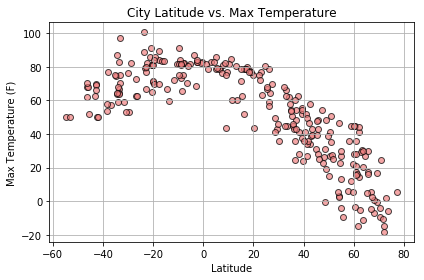

In [44]:
# Build scatter plot for Temperature vs. Latitude

plt.scatter (lat, max_temp, facecolors="lightcoral", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("images/MaxTemp.png")
plt.tight_layout()
plt.show()


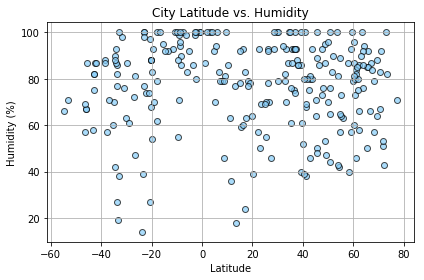

In [45]:
# Build scatter plot for Humidity vs. Latitude

plt.scatter (lat, humidity, facecolors="lightskyblue", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig("images/Humidity.png")
plt.tight_layout()
plt.show()

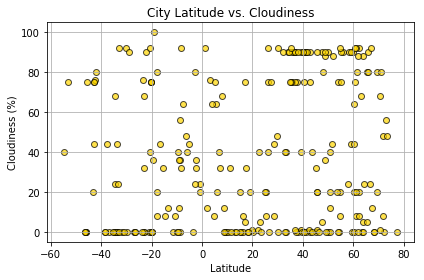

In [46]:
# Build scatter plot for Cloudiness vs. Latitude

plt.scatter (lat, cloudiness, facecolors="gold", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig("images/Cloudiness.png")
plt.tight_layout()
plt.show()

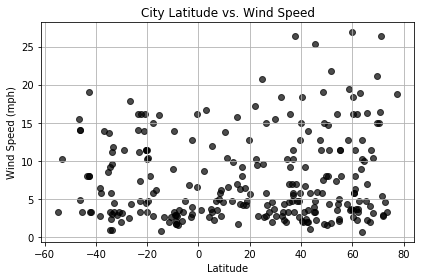

In [47]:
# Build scatter plot for Wind Speed vs. Latitude

plt.scatter (lat, wind_speed, facecolors="black", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig("images/Wind.png")
plt.tight_layout()
plt.show()